# Particle and gas velocity difference

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.decomposition import PCA
import matplotlib.colors as colors
import torch
import torch.nn as nn
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.cm as cm
import re

In [2]:
vrel_out = sorted(list(glob.glob('./out/TurbPar.out2.*.hdf5-vrel_out.npy')))
vrel_tgt = sorted(list(glob.glob('./tgt/TurbPar.out2.*.hdf5-vrel.npy')))

In [3]:
def read_npy(paths,sep=2):
    npys = []
    for i,path in enumerate(paths):
        npys.append(np.load(path))
        if i % sep == 0:
            print(f'{i}:Loading {path} {npys[-1].shape}')
    print(f'Total of {len(npys)} files loaded')
    return npys
def get_frame(path):
    m = re.search('[0-9][0-9][0-9][0-9][0-9]',path)
    return m.group(0)

In [4]:
npy_vrel_out = read_npy(vrel_out)
npy_vrel_tgt = read_npy(vrel_tgt)

0:Loading ./out/TurbPar.out2.00040.hdf5-vrel_out.npy (3, 256, 256, 256)
2:Loading ./out/TurbPar.out2.00120.hdf5-vrel_out.npy (3, 256, 256, 256)
4:Loading ./out/TurbPar.out2.00200.hdf5-vrel_out.npy (3, 256, 256, 256)
Total of 5 files loaded
0:Loading ./tgt/TurbPar.out2.00040.hdf5-vrel.npy (3, 256, 256, 256)
2:Loading ./tgt/TurbPar.out2.00120.hdf5-vrel.npy (3, 256, 256, 256)
4:Loading ./tgt/TurbPar.out2.00200.hdf5-vrel.npy (3, 256, 256, 256)
Total of 5 files loaded


In [5]:
def rel_velc(vg,vd):
    return vd - vg # +ve means dust faster than gas and vice versa

In [6]:
frame = 3

In [7]:
def plot_compare(out,tgt,cmap='viridis',chn=0):
    #eps = np.unique(out)[1]
    #print('Epsilon:', eps)
    out_slice = out[chn,:,:,out.shape[-1]//2]
    tgt_slice = tgt[chn,:,:,tgt.shape[-1]//2]
    print(out_slice.shape, tgt_slice.shape)
    
    fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(18,18))
    
    q1,q3 = np.quantile(out_slice,[0.25,0.75])
    q_min,q_max = np.min(out_slice), np.max(tgt_slice)
    q_avg = 0.5*(np.abs(q3)+np.abs(q1))
    
    print('q1: ',q1,'; q3: ',q3)
    print('qmin: ',q_min,'; qmax: ',q_max)
    
    
    norm = colors.SymLogNorm(linthresh=0.01, linscale=0.01,
                             vmin=-0.5, vmax=0.5, base=10)
    
    im=cm.ScalarMappable(norm=norm,cmap=cmap)
    axs[0].set_title(f'Out slice; Dimension: {out.shape}; chn: {chn}')
    axs[1].set_title(f'Tgt slice; Dimension: {tgt.shape}; chn: {chn}')
    axs[0].pcolormesh(out_slice,cmap=cmap,norm=norm)
    axs[1].pcolormesh(tgt_slice,cmap=cmap,norm=norm)
    
    fig.colorbar(im, ax=axs,orientation='horizontal')
    axs[0].set_aspect('equal')
    axs[1].set_aspect('equal')
    
    return fig

# Training using velocity difference

In [8]:
for frame_id in range(len(npy_vrel_out)):
    frame_name = get_frame(vrel_out[frame_id])
    for chn in range(3):
        fig = plot_compare(npy_vrel_out[frame_id],npy_vrel_tgt[frame_id],cmap='RdBu_r',chn=chn)
        plt.savefig(f'./img/train-with-vdiff-{frame_name}-chn-{chn}.png')
        fig.clear()
        plt.close(fig)
    

(256, 256) (256, 256)
q1:  -0.0415426641702652 ; q3:  0.0050447843968868256
qmin:  -0.2820079 ; qmax:  0.34200054
(256, 256) (256, 256)
q1:  -0.02157674729824066 ; q3:  0.03012065216898918
qmin:  -0.1843023 ; qmax:  0.31775558
(256, 256) (256, 256)
q1:  -0.02285686694085598 ; q3:  0.024965854827314615
qmin:  -0.2940995 ; qmax:  0.37181178
(256, 256) (256, 256)
q1:  -0.03390521928668022 ; q3:  0.0133848637342453
qmin:  -0.21453445 ; qmax:  0.37422478
(256, 256) (256, 256)
q1:  -0.019038147758692503 ; q3:  0.03016314236447215
qmin:  -0.26348174 ; qmax:  0.34242368
(256, 256) (256, 256)
q1:  -0.029489253647625446 ; q3:  0.016417996492236853
qmin:  -0.35016373 ; qmax:  0.32000926
(256, 256) (256, 256)
q1:  -0.0397228691726923 ; q3:  0.011593293864279985
qmin:  -0.227054 ; qmax:  0.3676648
(256, 256) (256, 256)
q1:  -0.020334910601377487 ; q3:  0.0266950661316514
qmin:  -0.18947908 ; qmax:  0.3196268
(256, 256) (256, 256)
q1:  -0.01872530346736312 ; q3:  0.024423630442470312
qmin:  -0.31745

## Channel 0 (vx)

(256, 256) (256, 256)
q1:  -0.04054274223744869 ; q3:  0.00738500664010644
qmin:  -0.23998897 ; qmax:  0.3681075


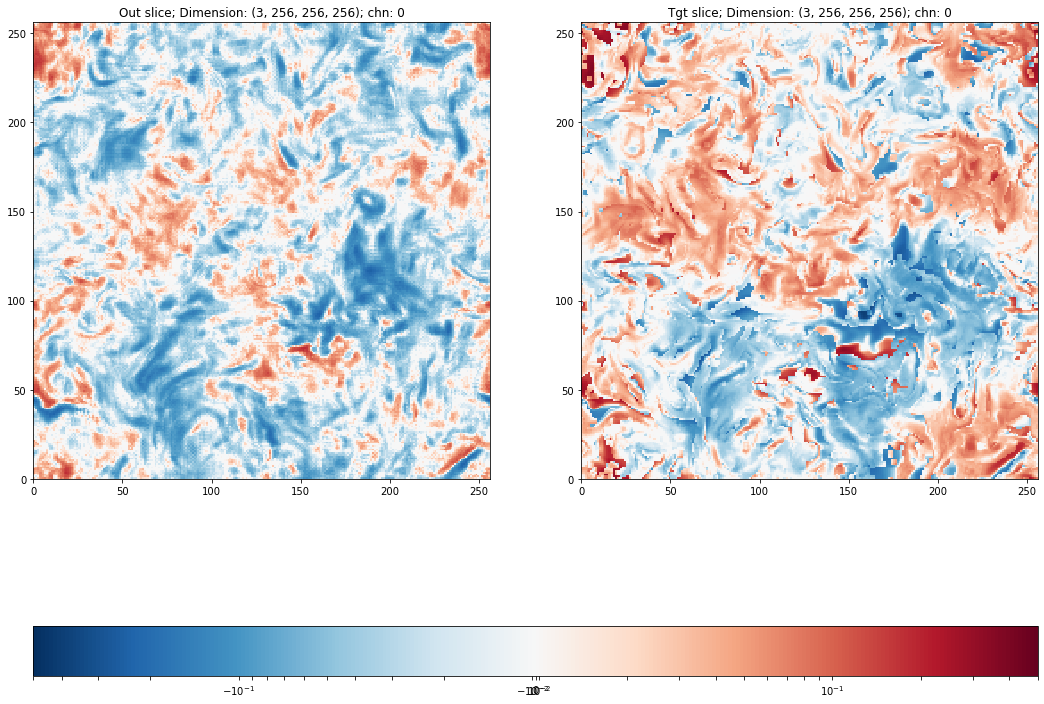

In [9]:
fig = plot_compare(npy_vrel_out[frame],npy_vrel_tgt[frame],cmap='RdBu_r',chn=0)

## Channel 1 (vy)

(256, 256) (256, 256)
q1:  -0.016761163715273142 ; q3:  0.027895846869796515
qmin:  -0.25427234 ; qmax:  0.27687225


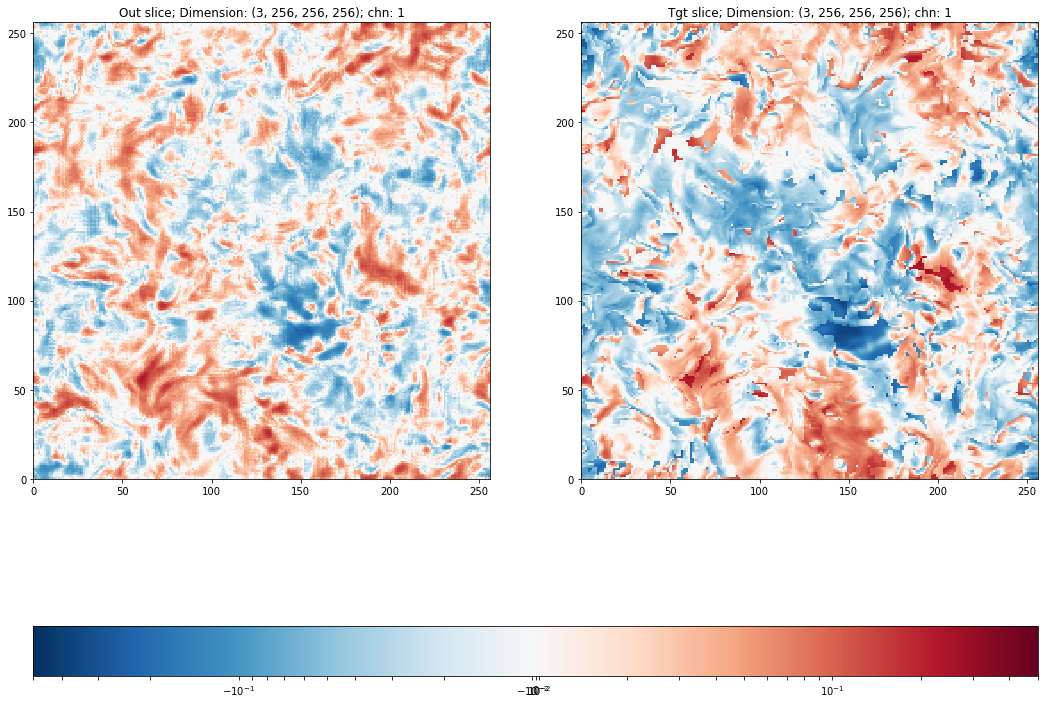

In [10]:
fig = plot_compare(npy_vrel_out[frame],npy_vrel_tgt[frame],cmap='RdBu_r',chn=1)

## Channel 2 (vz)

(256, 256) (256, 256)
q1:  -0.03141292091459036 ; q3:  0.016080252826213837
qmin:  -0.3396299 ; qmax:  0.30600908


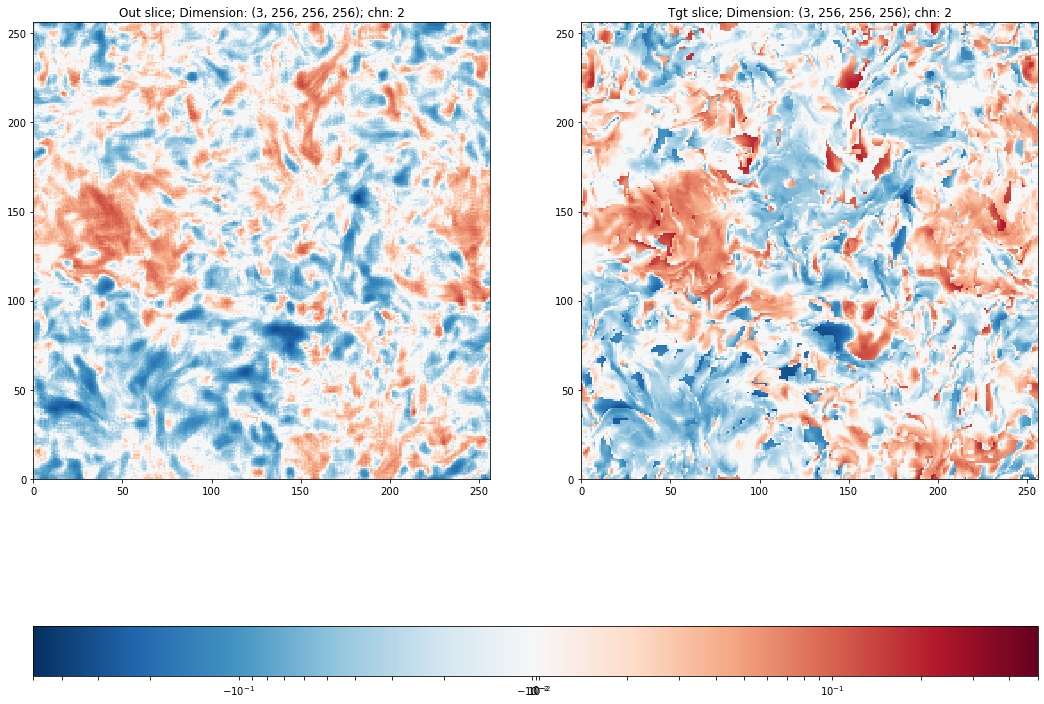

In [11]:
fig = plot_compare(npy_vrel_out[frame],npy_vrel_tgt[frame],cmap='RdBu_r',chn=2)

In [12]:
from matplotlib import animation, rc
from IPython.display import HTML, Image

In [13]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

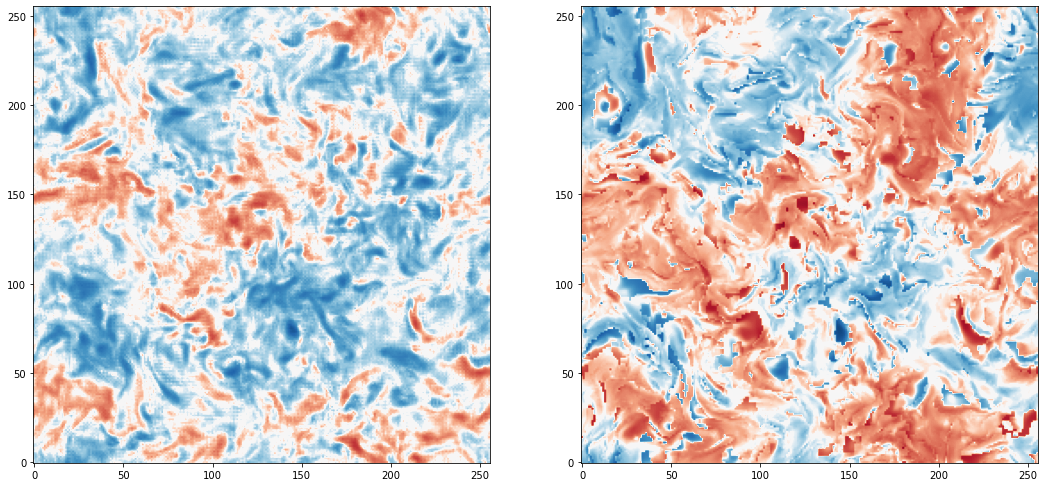

In [20]:
import matplotlib.animation as animation

norm = colors.SymLogNorm(linthresh=0.01, linscale=0.01,
                             vmin=-0.5, vmax=0.5, base=10)
cmap = 'RdBu_r'

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(18,18))
pm0 = axs[0].imshow(npy_vrel_out[frame][0,:,:,0],origin='lower',cmap=cmap,norm=norm)
pm1 = axs[1].imshow(npy_vrel_tgt[frame][0,:,:,0],origin='lower',cmap=cmap,norm=norm)

def animate(x3slice):
    pm0.set_array(npy_vrel_out[frame][0,:,:,x3slice])
    pm1.set_array(npy_vrel_tgt[frame][0,:,:,x3slice])
    return pm0,pm1

ani = animation.FuncAnimation(fig, animate, npy_vrel_out[frame].shape[-1], blit=True, interval=10,
repeat=False)


ani

#gif_writer = animation.PillowWriter(fps=5)
#ani.save("TLI.gif", dpi=300, writer=animation.PillowWriter(fps=25))

    
#n3_max = out.shape[-1]
#for n3 in range(n3_max):
#    out_slice = out[chn,:,:,n3]
#    tgt_slice = tgt[chn,:,:,n3]

# Distribution of velocities

Since the graph above seems to indicate that the network does not perform very well, maybe plotting the distribution will help us understand better what exactly goes wrong. Here we define the following distributions:

\begin{align*}
f_0(v)dv = \text{Probability of relative velocity } v_r \text{ to have values from} v \text{ to } v +dv
\end{align*}


In [17]:
def prob_den(arr,bins=100):
    den,edgs = np.histogram(arr,density=True,bins=bins)
    x,dx = 0.5*(edgs[1:]+edgs[:-1]),edgs[1:]-edgs[:-1]
    return (x,den,dx)

In [18]:
vrel_out,vden_out,_ = prob_den(npy_vrel_out[frame])
vrel_tgt,vden_tgt,_ = prob_den(npy_vrel_tgt[frame])

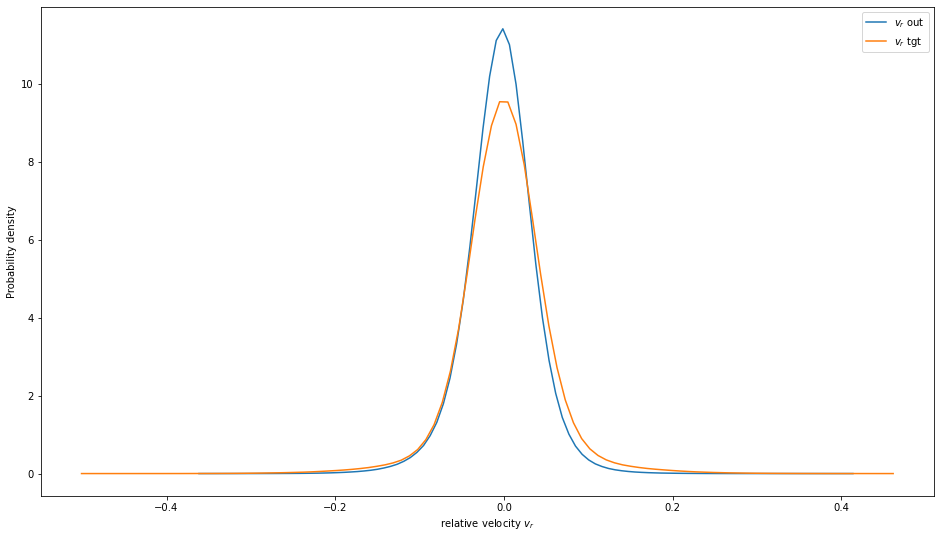

In [19]:
fig,ax = plt.subplots(1,1,figsize=(16,9))
ax.plot(vrel_out,vden_out,label=r'$v_{r}$ out')
ax.plot(vrel_tgt,vden_tgt,label=r'$v_{r}$ tgt')
ax.set_xlabel(r'relative velocity $v_r$')
ax.set_ylabel(r'Probability density')
plt.legend()